In [1]:
import numpy as np
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
from astropy.convolution import convolve_fft, convolve, Gaussian2DKernel
import matplotlib.pyplot as plt
import spectral_cube
import aplpy
from math import ceil
import pyspeckit
import colorcet
import matplotlib as mpl
from glob import glob

plt.style.use('paper')

In [2]:
inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_lowres/HNCO_7m12mTP_CubeMosaic_downsample9.contsub.masked.max.fits'
inputfile_max_nomask = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_lowres/HNCO_7m12mTP_CubeMosaic_downsample9.contsub.max.fits'
inputfile_cont = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12mtp_cont/cont_12mtp_final_filled.fits'
inputfile_cont12m = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m_cont/cont_12m.fits'
inputfile_meerkat = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/misc/regrid_crop/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
inputfile_rgb_fits = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/data_regrid/hershel160.fits'
inputfile_rgb_png = '/Users/abarnes/Dropbox/work/Smallprojects/ppVII/review/cover/rgb_final_uncropped.jpeg'

hdu_cont = fits.open(inputfile_cont)[0]
hdu_cont12m = fits.open(inputfile_cont12m)[0]
hdu_cont12m_mask = fits.PrimaryHDU(~np.isnan(hdu_cont12m.data)*1, hdu_cont12m.header)

No contour levels were found within the data range.


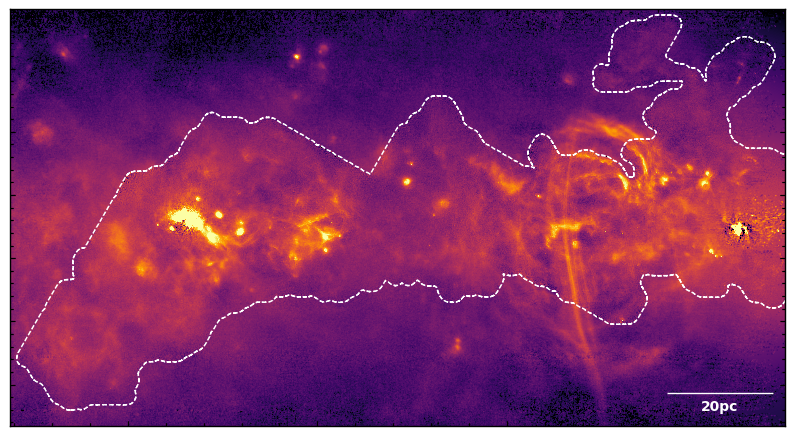

In [3]:
l = 0.3942499
b = -0.0299999
width = 1.0223360
height = 0.5495056

fig = plt.figure(figsize=(10, 10)) 
ax = aplpy.FITSFigure(hdu_cont, figure=fig, subplot=(1,1,1))
  
vmin, vmax = np.nanpercentile(hdu_cont.data, [2,99.8])
ax.show_colorscale(cmap='inferno', vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.hide()
ax.axis_labels.hide()
ax.ticks.set_color('black')
ax.set_nan_color('lightgrey')
ax.add_scalebar(500*u.arcsec, corner='bottom right', color='white')
ax.scalebar.set_label('20pc')
ax.show_contour(hdu_cont12m_mask, levels=[0], colors='white', linewidths=1, linestyles='--')

fig.subplots_adjust(wspace=0.02, hspace=0.02)
# fig.savefig('../figures/cont.pdf', bbox_inches='tight', dpi=300)
fig.savefig('../figures/cont.png', bbox_inches='tight', dpi=300)